# Statistics

In this notebook, you will work with CO2 emissions data and life expectancy data from the [Gapminder Foundation](https://www.gapminder.org/). You will learn some basics of data exploration using R, such as inferring the underlying data distributions and testing statistical hypotheses on this data.

In [21]:
# Load packages
library(ggplot2)   # Plotting package

In [22]:
# Set plot size for upcoming plots
options(repr.plot.width = 12, repr.plot.height = 8)

First, we begin by reading the CSV files directly from the Github directory (the original data can be obtained from https://www.gapminder.org/data/). Because the CSV files were saved using Swiss format, we must specify the column separator to be a semi-colon, the default separator is a comma and this is what you will encounter in most CSV files. In general, when loading a CSV file, if the data in R looks very strange, you should make sure the separator matches that of the CSV file (open it with a text editor, e.g. Notepad, to see what the separator is).

In [23]:
# Read CSVs from the Github directory directly.
co2_emissions <- read.csv("https://raw.githubusercontent.com/SEPS-UniSG/statistics/main/data/co2_emissions_tonnes_per_person.csv", sep = ";")
life_expectancy <- read.csv("https://raw.githubusercontent.com/SEPS-UniSG/statistics/main/data/life_expectancy_years.csv", sep = ";")

## CO2 Emissions
We start by working with the CO2 emissions data. Let us begin by displaying the first few lines of the dataset to better understand how the data looks like.

In [24]:
head(co2_emissions, 10) # Displays the first 10 lines of the co2_emissions dataset

,country,X1800,X1801,X1802,X1803,X1804,X1805,X1806,X1807,X1808,⋯,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
2,Albania,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Algeria,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3.400,3.28,3.270,3.430,3.48,3.680,3.800,3.640,3.560,3.690
4,Andorra,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
5,Angola,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
6,Antigua and Barbuda,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,5.880,5.96,5.750,5.800,5.73,5.700,5.840,5.900,5.890,5.880
7,Argentina,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4.420,4.57,4.610,4.600,4.56,4.560,4.640,4.600,4.550,4.410
8,Armenia,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.510,1.48,1.730,1.990,1.91,1.910,1.650,1.760,1.700,1.890
9,Australia,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,18.800,18.40,18.000,17.800,17.10,16.700,16.800,17.000,17.000,16.900


Taking the data from 2018 (column `X2018`), we plot the histogram and mean of the cross-sectional data and display its summary statistics.

### A note on plotting in R
R offers a few simple plotting functions in its base packages. There is, however, a library called `ggplot2` that provides an amazing toolbox for custom plots. This is the most widely used plotting library in R.

The basic R plots have the advantage of being easier to understand and they provide the minimum needed in a few lines. `ggplot2` on the other hand, is a bit more complicated to understand but it brings plotting to another level, this is especially useful when writing a paper or assignment.

In this notebook, we will provide some basic R plot codes as well as some `ggplot2` plot codes as each have their own advantages and disadvantages. When you want to quickly look at a histogram or scatterplot of your data, the basic plotting function will do the job just fine. But when you want to create a fancy plot for an assignment or presentation, you will be glad to know how to do it with `ggplot2`!

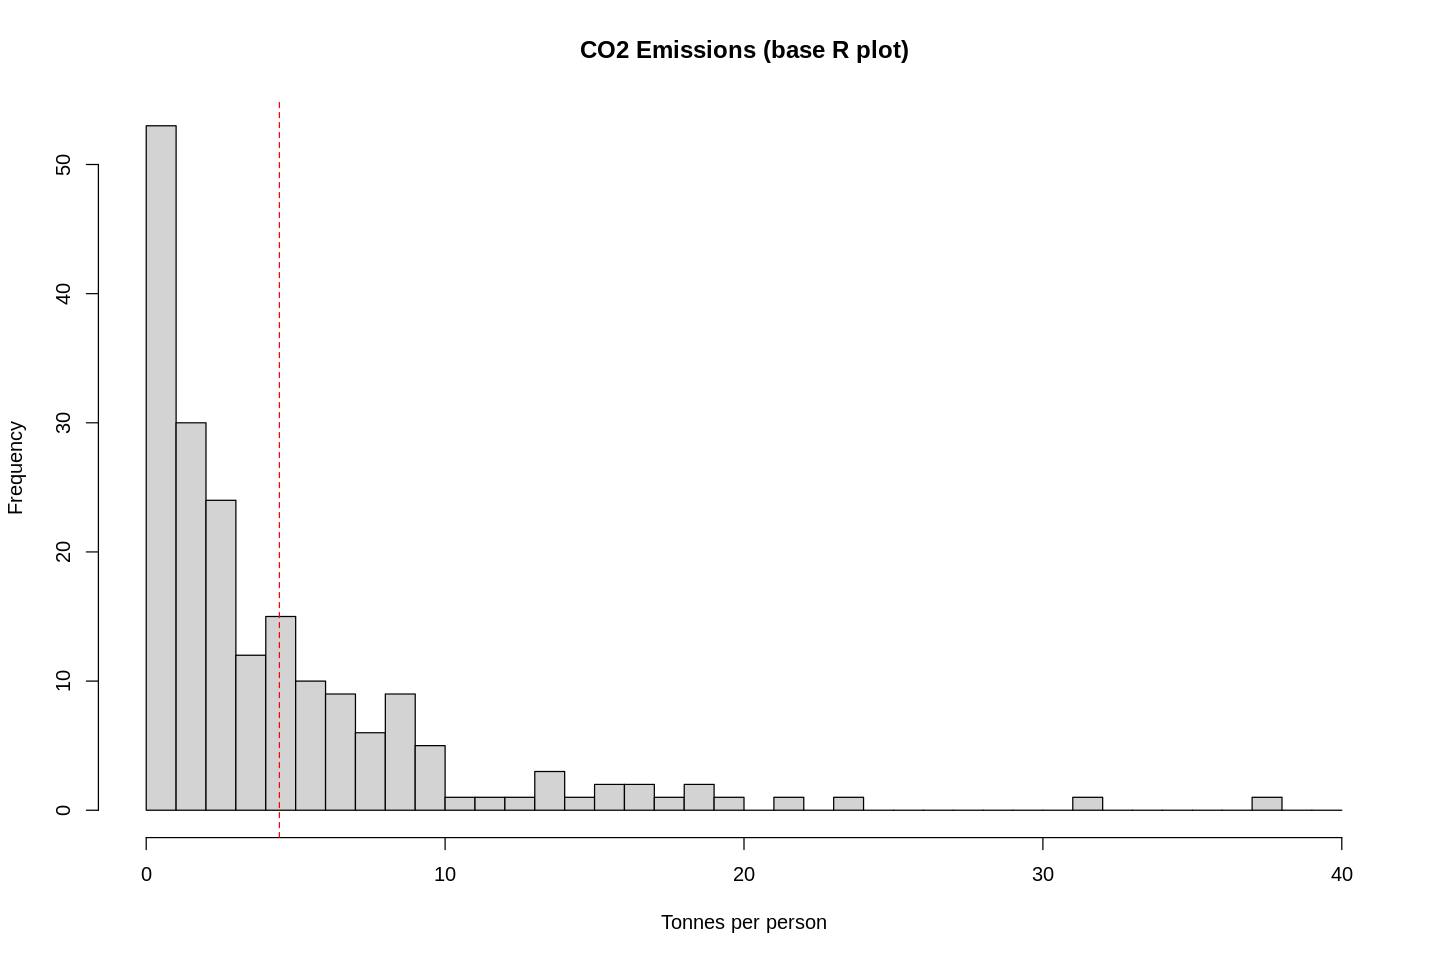

In [25]:
mu <- mean(co2_emissions$X2018) # Store the mean
# Compute a vector of breaks for the histogram (this is generally not needed),
# however, ggplot2 and the base histogram use different methods to compute and
# display histograms, hence this is needed to ensure that the 2 plots match
breaks <- seq(0, 40, by = 1)
# Plot the histogram (breaks refers to the number of bins)
hist(co2_emissions$X2018, xlab = "Tonnes per person", 
  main = "CO2 Emissions (base R plot)", breaks = breaks)
# Plot the mean as a dashed vertical red line
abline(v = mu, col = "red", lty = 2) 

The above code for plotting was quite straightforward, as we see below, `ggplot2` is slightly more complex. When first implementing your own plots using `ggplot2`, it's always a good idea to have a look at https://ggplot2.tidyverse.org/index.html where you will find many examples of different plots.

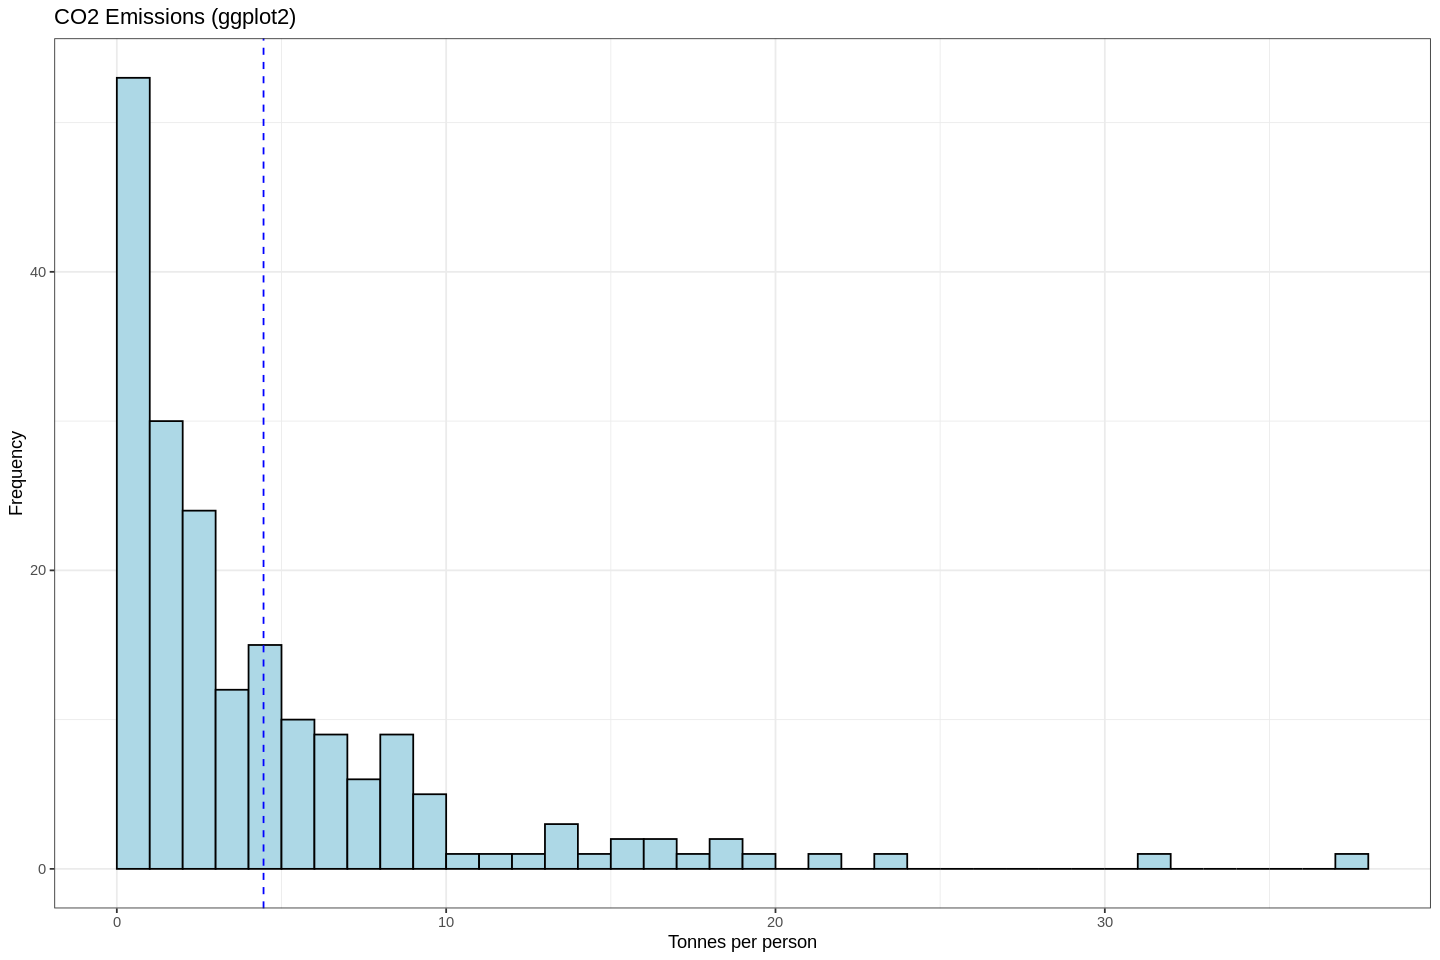

In [26]:
# ggplot "stacks" multiple layers the first function defines the underlying data
# and the aesthetics, i.e. the x- and y-axis but also the color/fill based on data
ggplot(data = co2_emissions, aes(x = X2018)) + 
  # Add a histogram layer with a binwidth of 1, black borders and lightblue fill
  geom_histogram(binwidth = 1, color = "black", fill = "lightblue", boundary = 0) +
  # Add labels to the x- and y-axis as well as a title
  labs(x = "Tonnes per person", y = "Frequency", title = "CO2 Emissions (ggplot2)") +
  # Add a vertical line at x = mu with a blue color and a dashed linetype
  geom_vline(xintercept = mu, color = "blue", lty = "dashed") +
  # Add a "theme" to your plot, try changing it to one of the following:
  # theme_gray, theme_dark, theme_void, theme_minimal
  theme_bw()

In [27]:
# Displays the summary statistics of co2_emissions$X2018
summary(co2_emissions$X2018)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0243  0.6693  2.5300  4.4550  5.9250 38.0000 

The histogram hints toward the data following a **Poisson** or an **exponential** distribution. Both the Poisson and exponential distributions are fully defined by their rate parameter $\lambda$, which is also equal to the mean for the Poisson distribution and equal to the inverse of the mean for the exponential distribution.

To get a clearer visual intuition of how the distributions line up with the data, we overlay the probability density functions with rate parameter $\hat{\lambda}$ estimated through maximum-likelihood estimation.

Furthermore, we plot the empirical cumulative distribution function of the data and compare it to a plot the cumulative distribution functions of the Poisson and exponential distributions.

### A note on probability distributions in R
As a statistical programming language, R offers many useful statistical functions in its base libraries. For instance, a lot of probability distributions come directly with 4 functions, e.g. consider a standard normal random variable $X \sim \mathcal{N}(0, 1)$:
+ `dnorm(x)` returns the probability density function evaluated at `x`, i.e. $f(x) = \frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}$.
+ `pnorm(x)` returns the cumulative distribution function evaluated at `x`, i.e. $F(x) = P[-\infty  \leq X < x]$.
+ `qnorm(p)` returns the quantile function evaluated at `p`, i.e. $Q(p) = \inf\{x \in \mathbb{R} : p \leq F(x)\}$.
+ `rnorm(n)` returns a vector of length $n$ where each entry of the vector is randomly distributed according to a standard normal distribution.

These 4 functions also exist for other types of probability distribution, e.g. `dpois`, `ppois`, `qpois`, `rpois` for a Poisson distribution, `dunif`, `punif`, `qunif`, `runif` for a uniform distribution, etc. These functions will be extremely handy in a lot of cases so be sure to play around and understand how they work. 

To have a look at the parameter required by the functions, you can either use `?function_name` or `help(function_name)`, e.g. `?dpois` will give information on the probability density function for the Poisson distribution in R.

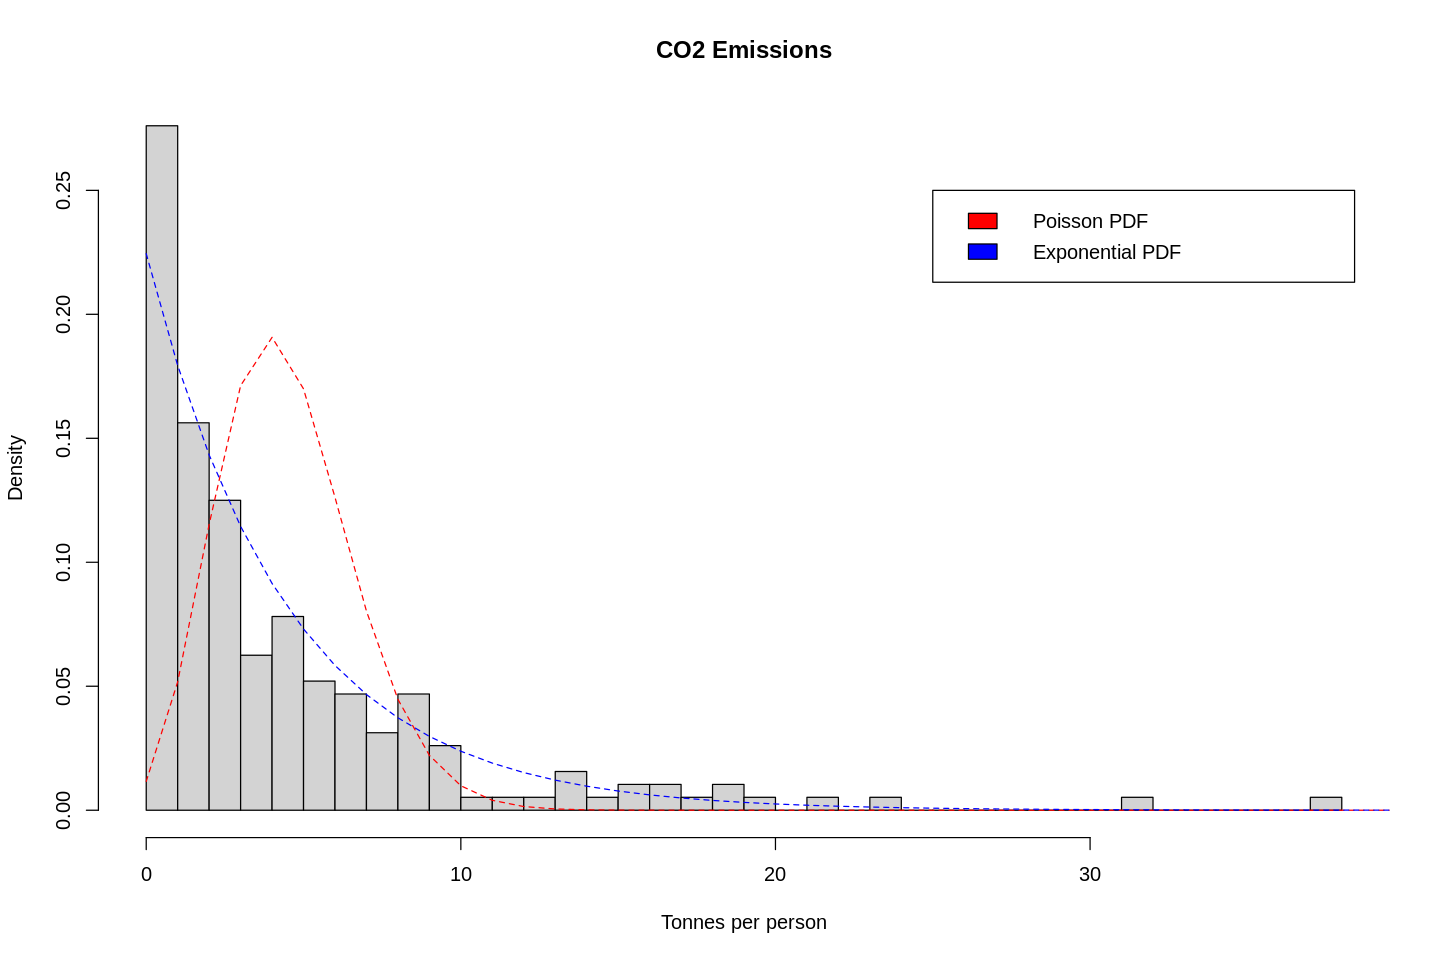

In [28]:
xrange <- 0:40 # Define a range for the x-axis
# Plot the histogram
hist(co2_emissions$X2018, xlab = "Tonnes per person", main = "CO2 Emissions", breaks = 30, freq = FALSE)
# Overlay the probability density functions
lines(xrange, dpois(xrange, mu), lty = 2, col = "red")
lines(xrange, dexp(xrange, 1/mu), lty = 2, col = "blue")
# Add a legend
legend(x = 25, y = 0.25, legend = c("Poisson PDF", "Exponential PDF"), 
  fill = c("red", "blue"))

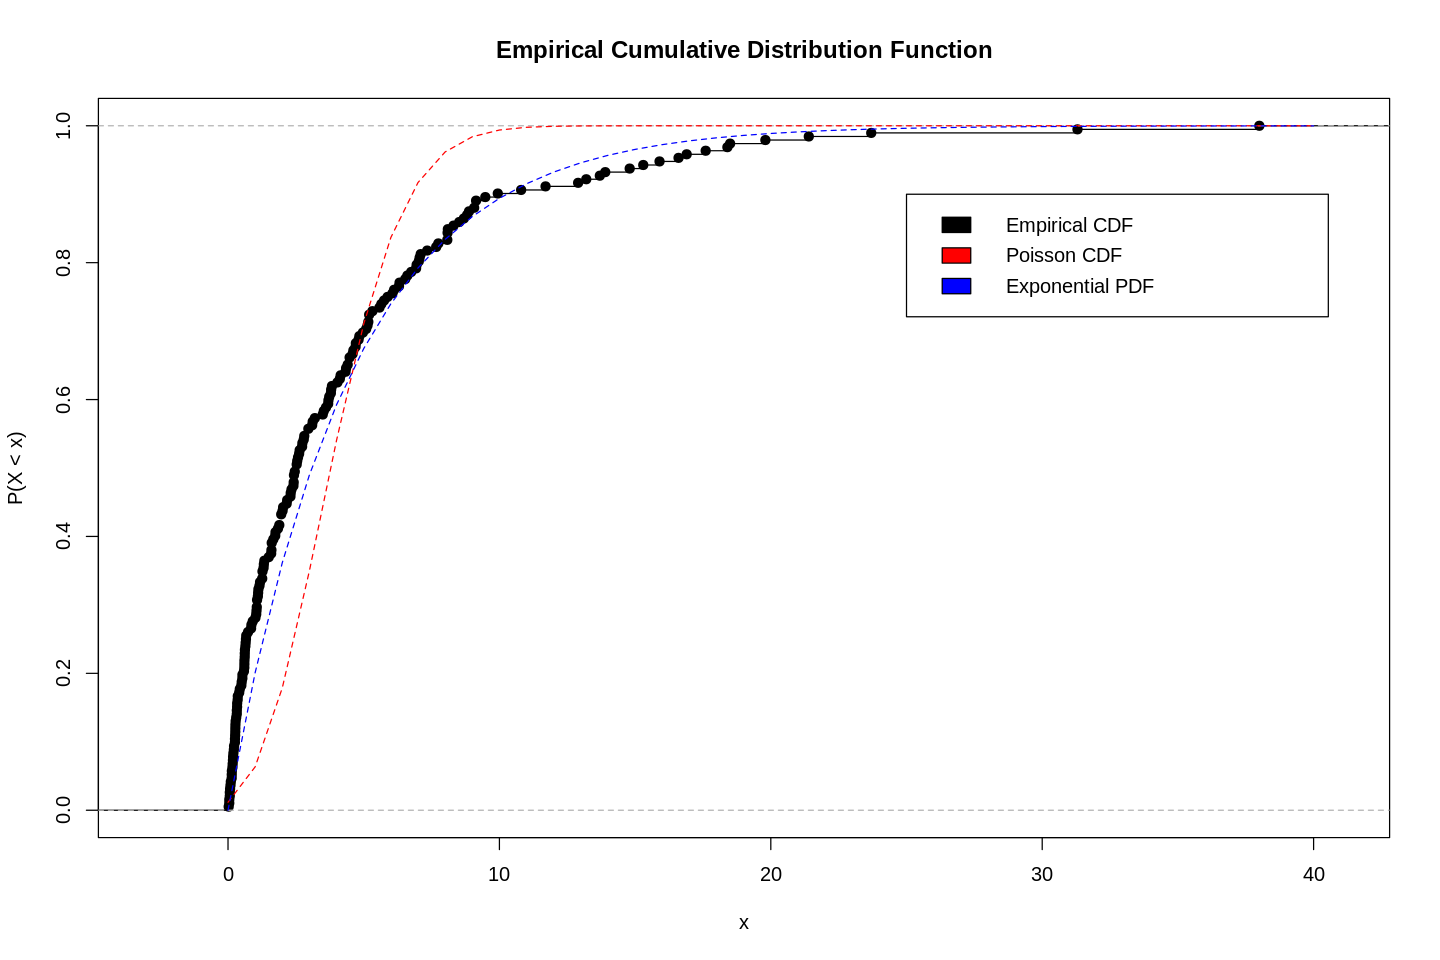

In [29]:
# Plot the empirical CDF of the data
plot(ecdf(co2_emissions$X2018), main = "Empirical Cumulative Distribution Function",
  ylab = "P(X < x)")
# Plot the true CDFs
lines(xrange, ppois(xrange, mu), lty = 2, col = "red")
lines(xrange, pexp(xrange, 1/mu), lty = 2, col = "blue")
legend(x = 25, y = 0.9, legend = c("Empirical CDF", "Poisson CDF", "Exponential PDF"), 
  fill = c("black", "red", "blue"))

From this visual test, we conclude that the exponential distribution with rate parameter $\lambda = \frac{1}{\bar{x}}$ is a better fit for the life CO2 emissions data sample than the Poisson distribution with rate parameter $\lambda = \bar{x}$ (where $\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i \approx 4.46$ is the sample mean).

### Evolution of average CO2 emissions over the years
We now turn to the question of whether the average CO2 emissions have evolved over the years. To answer this question, we compare the mean of the data from 2010 to that of 2018.

In [30]:
# Compute the mean CO2 emissions for 2010
mu_2010 <- mean(co2_emissions$X2010, na.rm = TRUE)
mu_2010

[1] 4.684943

#### Confidence Interval
Before we go on with the hypothesis testing, we build a 95% confidence interval around the mean from the 2010 data ($\frac{1}{N}\sum_{i=1}^N x_i = \bar{X}_{2010} = 4.68$). 

Recall that, by the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), that for a sequence of i.i.d. variables $\{X_1, X_2, \dots, X_n\}$, for large enough $n$, the sampling distribution of the mean approaches normality, i.e. $\bar{X}_n \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$ where $\mu = \mathbb{E}[X_i]$ and $\sigma^2 = \mathbb{V}[X_i]$ are the variables' mean and variance respectively.

Hence we can compute the 95% confidence interval for the 2010 data by using the 2.5% and 97.5% quantiles of a normal distribution with mean $\hat{\mu}_\mu = \hat{\mu} = \bar{X}_{2010}$ and standard deviation $\hat{\sigma}_\mu = \frac{\hat{\sigma}}{\sqrt{N}} = \sqrt{\frac{\sum_{i=1}^N (x_i - \hat{\mu})^2}{N(N-1)}}$, where the subscript $_\mu$ is used to make it explicit that these values refer to the sampling distribution of the mean and not to the data itself.

The confidence interval can then be written as $CI = \hat{\mu}_\mu \pm z_{(1-\alpha/2)} \hat{\sigma}_\mu$, where $z_{(1-\alpha/2)}$ is the $100(1-\frac{\alpha}{2})^\text{th}$ quantile of a standard normal distribution. This is $\approx 1.64$ for a 10% confidence level ($\alpha = 0.1$) and $\approx 1.96$ for a 5% confidence level ($\alpha = 0.05$). Oftentimes you will just encounter these numbers instead of the exact quantiles, so it is important to know what they stand for.

In [31]:
# Compute the confidence interval bounds for the 2010 mean
N <- sum(!is.na(co2_emissions$X2010))
lb <- mu_2010 - qnorm(.975) * sd(co2_emissions$X2010, na.rm = TRUE) / sqrt(N)
ub <- mu_2010 + qnorm(.975) * sd(co2_emissions$X2010, na.rm = TRUE) / sqrt(N)
print(paste0("Confidence interval: [", round(lb, 2), "; ", round(ub, 2), "]"))
print(paste0("Sample mean for 2018: ", 
  round(mean(co2_emissions$X2018, na.rm = TRUE), 2)))

[1] "Confidence interval: [3.82; 5.55]"
[1] "Sample mean for 2018: 4.46"


We see that our confidence interval is $CI = [3.82; 5.55]$ and hence the sample mean we obtained for the 2018 data ($4.46$) is well within the bounds of the confidence interval.

#### Hypothesis Test
Given our visual inspection above, we assume that CO2 emissions follow an exponential distribution. As we have estimated the rate parameter for the 2010 data, we denote $\lambda_0 = \frac{1}{4.68}$ the parameter of our target hypothesis. Our hypothesis is:
$$
\begin{aligned}
H_0&: \lambda = \lambda_0 \\
H_1&: \lambda \neq \lambda_0,
\end{aligned}
$$
i.e. we test the target hypothesis that the rate parameter of the data in 2018 is the same as that in 2010 against the alternative hypothesis that the rate parameter (and hence the mean) differs. We set the level of our test to be $\alpha = 0.05$ and thus we have a 5% probability to reject $H_0$ if it were in fact true (type I error).

We proceed now with a slightly more complicated approach: we use a likelihood-ratio test as described in **section 9.11** of Dudewicz and Mishra (1988, p. 514). Let $\Theta_0 = \{\lambda_0\}$ be the set of parameters under the target hypothesis and $\Theta = \{\lambda : \lambda > 0\}$ the set of all possible parameters. The likelihood-ratio test statistic is then defined as:
$$
\begin{aligned}
LR &= \frac{\underset{\lambda \in \Theta_0}{\max}f(x|\lambda)}{\underset{\lambda \in \Theta}{\max}f(x|\lambda)} \\
&= \frac{\lambda_0^N e^{-\lambda_0 \sum_{i=1}^N x_i}}{\hat{\lambda}^N e^{-\hat{\lambda} \sum_{i=1}^N x_i}}, \ \text{with} \ \hat{\lambda} = \frac{1}{\bar{x}}=\left(\frac{1}{N}\sum_{i=1}^N x_i\right)^{-1} = \frac{1}{4.46} \\
&= \left(\frac{\lambda_0}{\hat{\lambda}}\right)^N e^{\left(\hat{\lambda}-\lambda_0\right)\sum_{i=1}^N x_i}
\end{aligned}
$$

Since $\Theta_0 \subset \Theta$, one of two cases can occur:
1. $\hat{\lambda} = \lambda_0$, the maximum likelihood estimate of $\lambda$ is equal to $\lambda_0$ and thus $LR = 1$
2. $\hat{\lambda} \neq \lambda_0 \Rightarrow f(x|\hat{\lambda}) > f(x|\lambda_0) \Rightarrow LR < 1$

In consequence, $LR$ will be between $0$ and $1$: the higher $LR$, the more evidence it provides for the target hypothesis, and, conversely, a low $LR$ provides evidence against the target hypothesis.

Hence, we want to reject the target hypothesis when $LR$ is small enough, i.e. when $\mathbb{P}_{\lambda_0}[LR < k] = \alpha$ for a given level $\alpha$.

$$\begin{aligned}
\alpha = 0.05 &= \mathbb{P}_{\lambda_0}[LR < k] \\
&= \mathbb{P}_{\lambda_0}[\log(LR) < \log(k)] \\
&= \mathbb{P}_{\lambda_0}[N\log \left(\frac{\lambda_0}{\hat{\lambda}}\right) + (\hat{\lambda}-\lambda_0) \sum_{i=1}^N x_i < \log(k)] \\
&= \mathbb{P}_{\lambda_0}\left[\sum_{i=1}^N x_i < \underbrace{\frac{\log(k) - N\log \left(\frac{\lambda_0}{\hat{\lambda}}\right)}{(\hat{\lambda}-\lambda_0)}}_{=k^\prime}\right] \\
&= \mathbb{P}_{\lambda_0}\left[\sum_{i=1}^N x_i < k^\prime \right]
\end{aligned}$$

Now, since under $H_0$, it holds that $\sum_{i=1}^N x_i \sim \Gamma \left(x \bigg|n-1, \frac{1}{\lambda_0}, 0\right)$ and we want a level of $\alpha = 0.05$, we must set $k^\prime = q_{0.05}$, where $q_{0.05}$ is the 5th percentile of the Gamma distribution under $H_0$. This gives us a 5% chance of type I error, that is: rejecting $H_0$ if it indeed were true.

In [32]:
# Compute lambda_0 from the 2010 data 
lambda_0 <- 1/mean(co2_emissions$X2010, na.rm = TRUE) 
# Compute N from the 2018 data
N <- sum(!is.na(co2_emissions$X2018))
# Compute k prime under the target hypothesis (notice that the shape is not N-1 
# but N and the rate is not 1/lambda_0 but lambda_0, this is due to a different 
# specification of the Gamma distribution in R than in Dudewicz & Mishra, 
# see later on in this notebook for a brief discussion)
k <- qgamma(0.05, shape = N, rate = lambda_0)
# Compute the sum of observations in 2018
xs <- sum(co2_emissions$X2018, na.rm = TRUE)
# Print the results
print(paste0("k prime = ", round(k, digits = 2)))
print(paste0("Sum of x = ", round(xs, digits = 2)))
# Reject H0 if the sum of x's is smaller than k prime
print(ifelse(xs < k, "Reject H0", "Fail to reject H0"))

[1] "k prime = 795.46"
[1] "Sum of x = 855.37"
[1] "Fail to reject H0"


As the computations above show, we find $k^\prime = 795.46$ and $\sum_{i=1}^N x_i = 855.37$. Consequently, $\sum_{i=1}^N x_i > k^\prime$, hence we fail to reject $H_0$ at the 95% significance level.

*Given our hypothesis test and the data at hand, we cannot assume that the CO2 emissions measured in 2018 are different from those measured in 2010.*

## Life Expectancy
We now turn to the life expectancy dataset, similarly to what we did above, we begin by showing the histogram of the data and compare it to the PDFs of well-known distributions.

We begin by showing the first 10 rows of the dataframe, just to see what our data looks like.

In [33]:
head(life_expectancy, 10) # Displays the first 10 lines of the life_expectancy dataset

,country,X1800,X1801,X1802,X1803,X1804,X1805,X1806,X1807,X1808,⋯,X2091,X2092,X2093,X2094,X2095,X2096,X2097,X2098,X2099,X2100
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,⋯,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,⋯,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
3,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,⋯,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
4,Andorra,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,⋯,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
6,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,⋯,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0
7,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,⋯,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6
8,Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,⋯,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.2,86.3,86.4
9,Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,⋯,91.0,91.2,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0


The first thing we notice is that the life expectancy data goes up to the year 2100. This is unexpected and prompts question on the underlying data. In general, if you encounter something similar in your own research / data exploration, it is crucial to check why the data looks the way it does.

In this case, we find [a summary documentation of the data](https://www.gapminder.org/data/documentation/gd004/) on the original website. As it turns out, data from 2017 to 2099 is computed using UN forecasts from *World Population Prospects*, while the data from 1970 to 2016 originates from the Institue of Health Metrics and Evaluation. Consequently, one should be particularly careful when comparing the data through the years, indeed if we were to repeat the ideas above and compare the 2018 and 2010 data, we would be comparing predictions to past measurements.

This short digression aside, we return to our data and plot the histogram of the 2016 life expectancy.

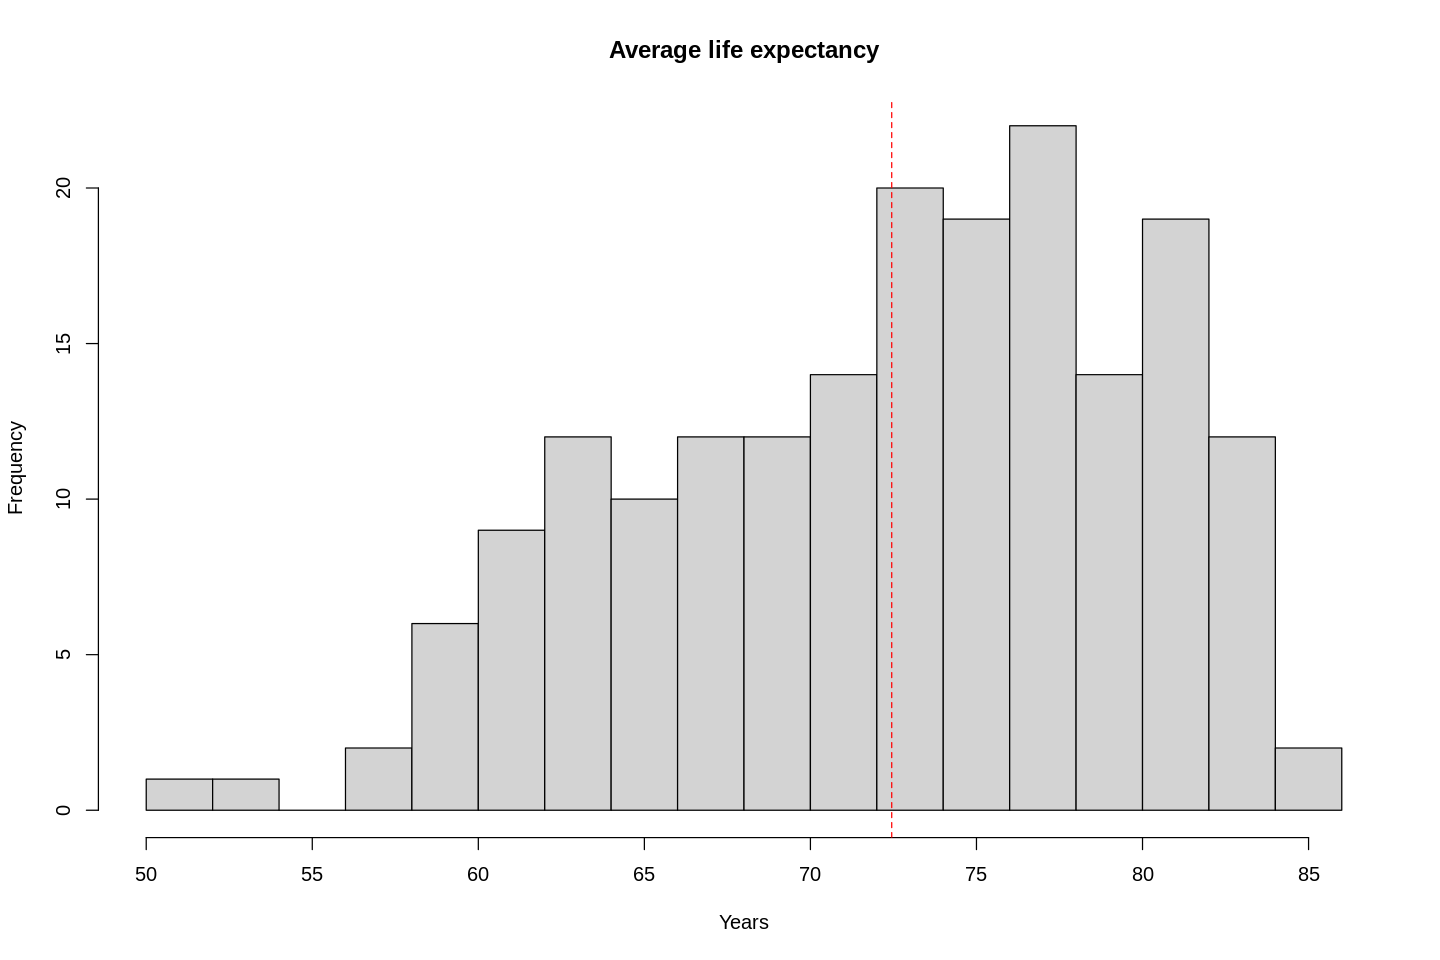

In [34]:
# Store the mean, because we have NA data, we must use na.rm = TRUE to get a valid mean
mu <- mean(life_expectancy$X2016, na.rm = TRUE) 
# Plot the histogram
hist(life_expectancy$X2016, xlab = "Years", main = "Average life expectancy", breaks = 20) 
# Plot the mean as a dashed vertical red line
abline(v = mu, col = "red", lty = 2) 

Considering the above histogram we decide to compare it to two different distributions: a **displaced exponential** distribution, and a **Gamma** distribution. To do so, we will do as in the first part of this notebook and overlay their probability distribution functions on top of the histogram. Furthermore, we will then compare their cumulative distribution function to the empirical CDF of the data.

The displaced exponential is not part of the base probability functions in R. However, the distribution without displacement exists, we will use this to build our custom PDF and CDF which allow for a displacement parameter.

In practice, you can also obtain the displaced exponential distribution functions from the `tolerance` library. This is slightly easier and quicker than building your own function. 


### Displaced Exponential
In Dudewicz and Mishra (1988), the PDF of the displaced exponential is given by **Definition 4.2.10**:
$$ f_X(x) = 
\begin{cases}
  \frac{1}{\beta} e^{-\frac{(x-A)}{\beta}}, &A \leq x < \infty \\
  0, &\text{otherwise.}
\end{cases}
$$

Note that this definition is slightly different from what you will find in most modern software or in the [Wikipedia article](https://en.wikipedia.org/wiki/Exponential_distribution). These notation use the parameter $\lambda$, the *rate*. This is simply the inverse of $\beta$, i.e. $\lambda = \frac{1}{\beta}$. For instance, R uses $\lambda$ instead of $\beta$, just make sure to check which parameters are used in your software of choice to avoid mistakes.

As mentioned above, R does not provide a displaced exponential in its base libraries, only a *standard* exponential. It is easy, however, to write a displaced exponential PDF in the form of a *standard* exponential PDF. 

Let $X$ be a displaced exponential RV with PDF $f_X$ as described above and let $Y$ be a non-displaced exponential RV with PDF $f_Y$:
$$ f_Y(y) = 
\begin{cases}
  \frac{1}{\beta_Y} e^{-\frac{y}{\beta_Y}}, &0 \leq y < \infty \\
  0, &\text{otherwise.}
\end{cases}
$$

Assume you want to evalute the PDF $f_X(x)$ of a displaced exponential with displacement parameter $A$, it suffices to evaluate the pdf of the non-displaced exponential (with the rate also displaced by $A$, i.e. setting $\frac{1}{\beta_Y} = \frac{1}{\beta}-A$) at $x-A$, i.e. $f_X(x) = f_Y(x-A)$.

In [35]:
# Writing our own functions for the displaced exponential CDF and PDF
# Simply use the base non-displaced function on a displaced x value. Notice also
# that the rate parameter used in R is equal to 1/beta
ddexp <- function(x, beta, A) { dexp(x-A, rate = 1/beta) }
pdexp <- function(x, beta, A) { pexp(x-A, rate = 1/beta) }
# Compute the displacement parameter as the minimum observation in the data
A <- min(life_expectancy$X2016, na.rm = TRUE)

### Gamma
The Gamma distribution is defined by a shape parameter $\alpha$, a rate parameter $\beta$, and a displacement parameter $A$ and its PDF is given by:
$$
f_X(x)= 
\begin{cases}
  \frac{\beta^\alpha}{\Gamma(\alpha)} (x-A)^{\alpha-1}e^{-\beta (x-A)},& \text{if } x \geq A\\
    0,              & \text{otherwise}
\end{cases}$$

You might notice that this PDF is not the same as the one you will find in **Definition 4.2.7** of Dudewicz and Mishra (1988). Once again, we take the CDF and PDF from [Wikipedia](https://en.wikipedia.org/wiki/Gamma_distribution) as it is generally closer to what you will find in modern software.

Of course, it is easy to show that both PDFs are equivalent, denote the parameters in Dudewicz and Mishra by a subscript of $\text{DM}$, we can simply replace $\beta$ and $\alpha$ with $\beta = \frac{1}{\beta_\text{DM}}$ and $\alpha = \alpha_\text{DM} + 1$ respectively, which gives the PDF as shown in **Definition 4.2.7** (Dudewicz and Mishra, 1988) or in the course slides:
$$
f_X(x)= 
\begin{cases}
  \frac{1}{\beta_{\text{DM}}^{\alpha_\text{DM}+1}\Gamma(\alpha_\text{DM}+1)} (x-A)^{\alpha_\text{DM}}e^{-\frac{(x-A)}{\beta_\text{DM}}},& \text{if } x \geq A\\
    0,              & \text{otherwise}
\end{cases}$$

We estimate both shape and rate parameters by method of moments, i.e. $\alpha = \frac{\mathbb{E}[X]^2}{\mathbb{V}[X]}$ and $\beta = \frac{\mathbb{E}[X]}{\mathbb{V}[X]}$, where $\mathbb{V}$ symbolizes the variance.

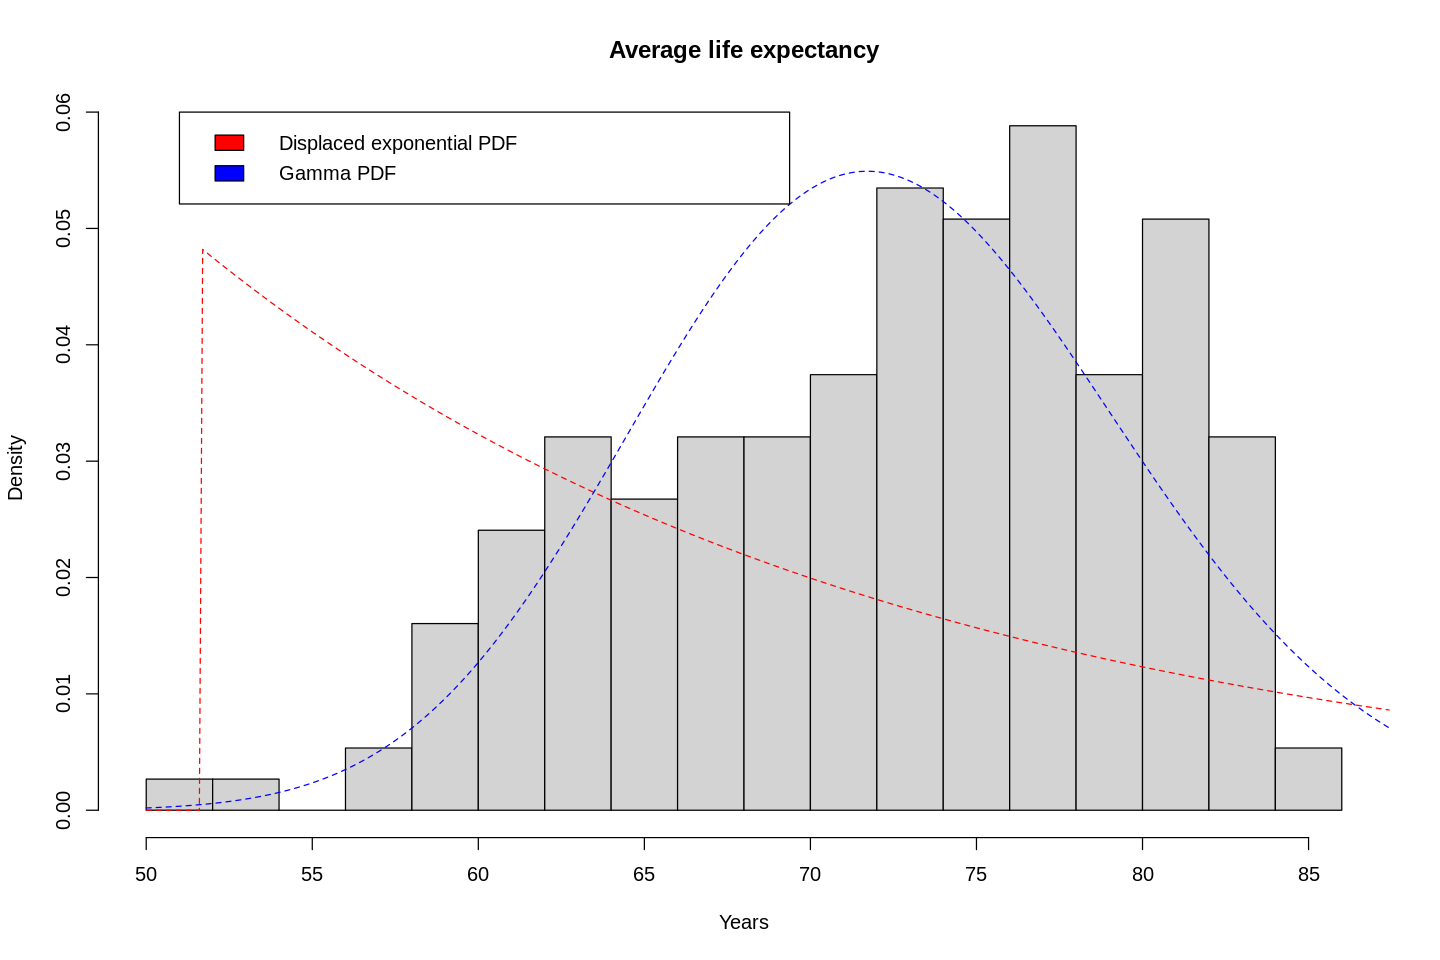

In [36]:
xrange <- seq(50, 90, by = 0.1)
# Estimate the shape and rate parameters by method of moments
alpha <- mu^2 / var(life_expectancy$X2016, na.rm = TRUE)
beta <- alpha / mu
# Plot the histogram
hist(life_expectancy$X2016, xlab = "Years", main = "Average life expectancy", 
  breaks = 20, freq = FALSE) 
# Overlay the probability density function of a displaced exponential distribution
lines(xrange, ddexp(xrange, mean(life_expectancy$X2016 - A, na.rm = TRUE), A), lty = 2, col = "red")
# Overlay the probability density function of a Gamma distribution
lines(xrange, dgamma(xrange, shape = alpha, rate = beta), lty = 2, col = "blue")
# Add a legend
legend(x = 51, y = 0.06, legend = c("Displaced exponential PDF", "Gamma PDF"), fill = c("red", "blue"))

From the above histogram with overlayed PDFs, it is quite clear that the Gamma distribution matches the data much better than the displaced exponential. Nevertheless, we also plot the empirical CDF of the data compared with both distributions' CDFs.

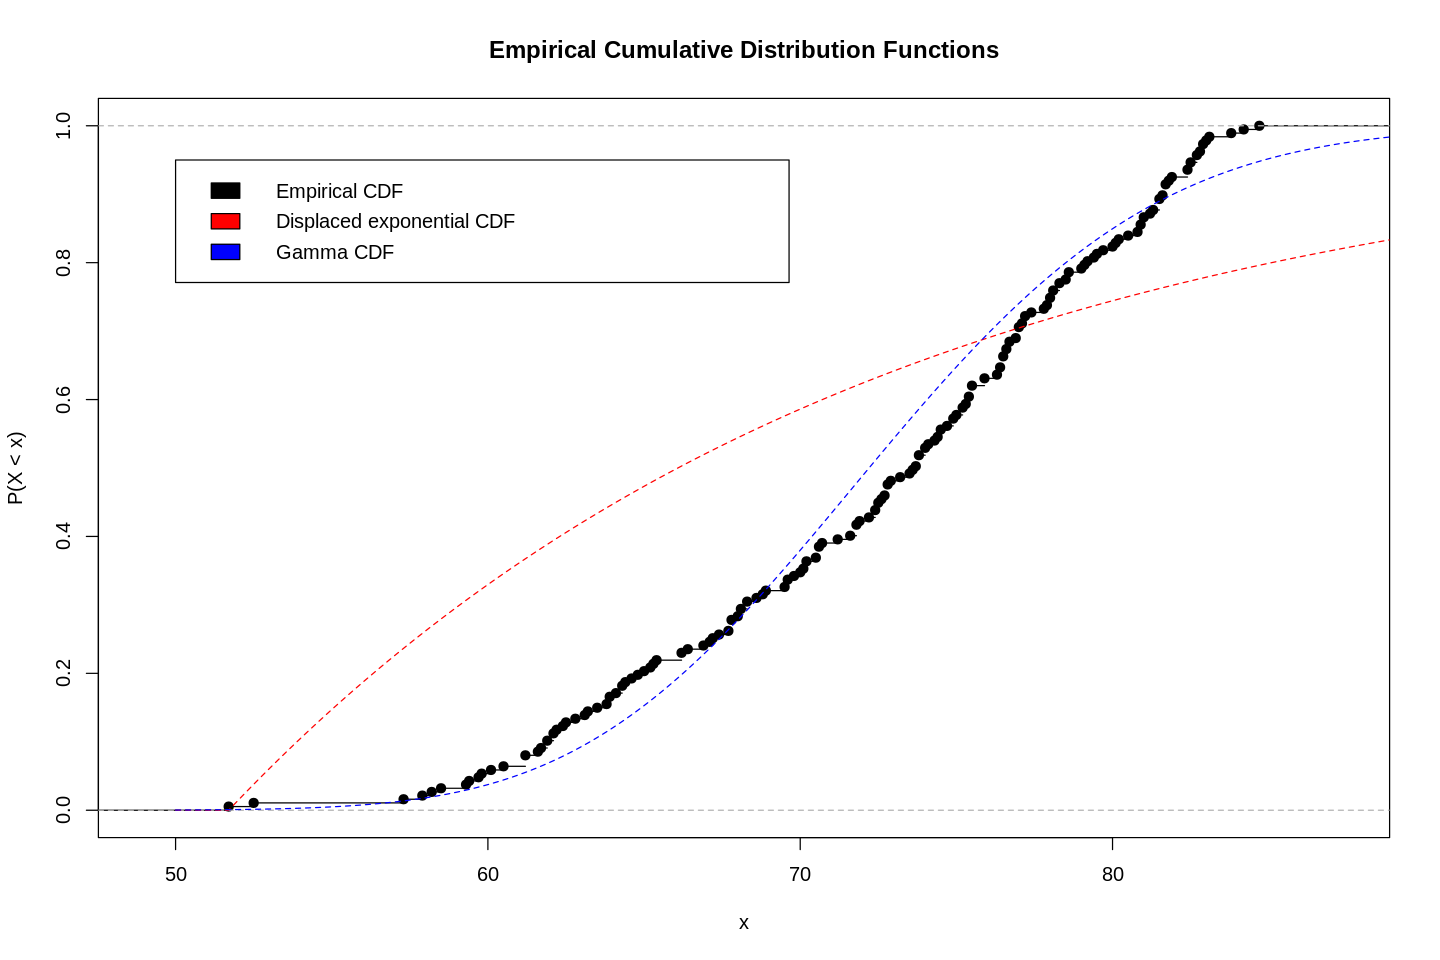

In [37]:
# Plot the empirical CDF of the data
plot(ecdf(life_expectancy$X2016), main = "Empirical Cumulative Distribution Functions",
  ylab = "P(X < x)")
# Plot the true CDF of the displaced exponential
lines(xrange, pdexp(xrange, mu - A, A), lty = 2, col = "red")
# Plot the true CDF of the Gamma distribution
lines(xrange, pgamma(xrange, shape = alpha, rate = beta), lty = 2, col = "blue")
# Add a legend
legend(x = 50, y = 0.95, legend = c("Empirical CDF", "Displaced exponential CDF",
  "Gamma CDF"), fill = c("black", "red", "blue"))

This plot gives a visual confirmation that our choice of a Gamma distribution fits the data much better than the displaced exponential.

Finally, we would like to see if the average life expectancy has changed over the past years but this time we take a different approach. We apply bootstrapping in order to find 95% confidence intervals around the average life expectancy average in 2010. We then compare the average life expectancy from 1975 to 2016 and see if it is within the 95% confidence interval of 2010.

Note that we take a look at two different bootstrapping procedures:
1. We draw samples from the observed data directly, this is a purely empirical approach.
2. We draw samples from a Gamma distribution with shape $\hat{\alpha}$ and rate $\hat{\beta}$, where both parameters are estimated by method of moments:

$$\begin{aligned}
\hat{\alpha} &= \frac{\mathbb{E}[X]^2}{\mathbb{V}[X]} = \frac{\frac{1}{N}\left(\sum_{i=1}^N x_i\right)^2}{\frac{1}{N}\left[\sum_{i=1}^N \left( x_i - \frac{1}{N}\left(\sum_{i=1}^N x_i\right)\right)^2\right]} \\
\hat{\beta} &= \frac{\mathbb{E}[X]}{\mathbb{V}[X]} = \frac{\hat{\alpha}}{\frac{1}{N}\left(\sum_{i=1}^N x_i\right)}
\end{aligned}
$$

In [38]:
# Compute population means and variance (R only computes sample variance)
N <- sum(!is.na(life_expectancy$X2010))
mu <- mean(life_expectancy$X2010, na.rm = TRUE)
sigma2 <- var(life_expectancy$X2010, na.rm = TRUE) * (N - 1) / N
# Estimate shape and rate by method of moments
alpha <- mu^2 / sigma2
beta <- alpha / mu

In [39]:
# Bootstrap mean values
n_rep <- 2000         # Number of Bootstrap repetitions
# Initialize a vector of NAs to store the means for both approaches
mu_empirical <- rep(NA, n_rep)  
mu_distributional <- rep(NA, n_rep)
for (i in 1:n_rep) {  # Iterate over the repetitions
  # Sample from the observed data with replacement, same size as the original data
  bsamp <- sample(life_expectancy$X2010, length(life_expectancy$X2010), 
    replace = TRUE)
  # Sample from the Gamma distribution with fitted parameters
  bdist <- rgamma(n_rep, shape = alpha, rate = beta)
  # Estimate mean of the bootstrap sample and store it in the vector of means
  mu_empirical[i] <- mean(bsamp)
  mu_distributional[i] <- mean(bdist)
}
# Extract the 2.5% and 97.5% quantiles of the bootstrapped means
lb_empirical <- quantile(mu_empirical, 0.025, names = FALSE)
ub_empirical <- quantile(mu_empirical, 0.975, names = FALSE)
lb_distributional <- quantile(mu_distributional, 0.025, names = FALSE)
ub_distributional <- quantile(mu_distributional, 0.975, names = FALSE)
# Print a comparison of both confidence intervals
print(paste0("'Empirical' bootstrap CI of mean:      [", 
  round(lb_empirical, digits = 2), "; ", round(ub_empirical, digits = 2), "]"))
print(paste0("'Distributional' bootstrap CI of mean: [", 
  round(lb_distributional, digits = 2), "; ", round(ub_distributional, digits = 2), "]"))

[1] "'Empirical' bootstrap CI of mean:      [69.17; 71.7]"
[1] "'Distributional' bootstrap CI of mean: [70.04; 70.88]"


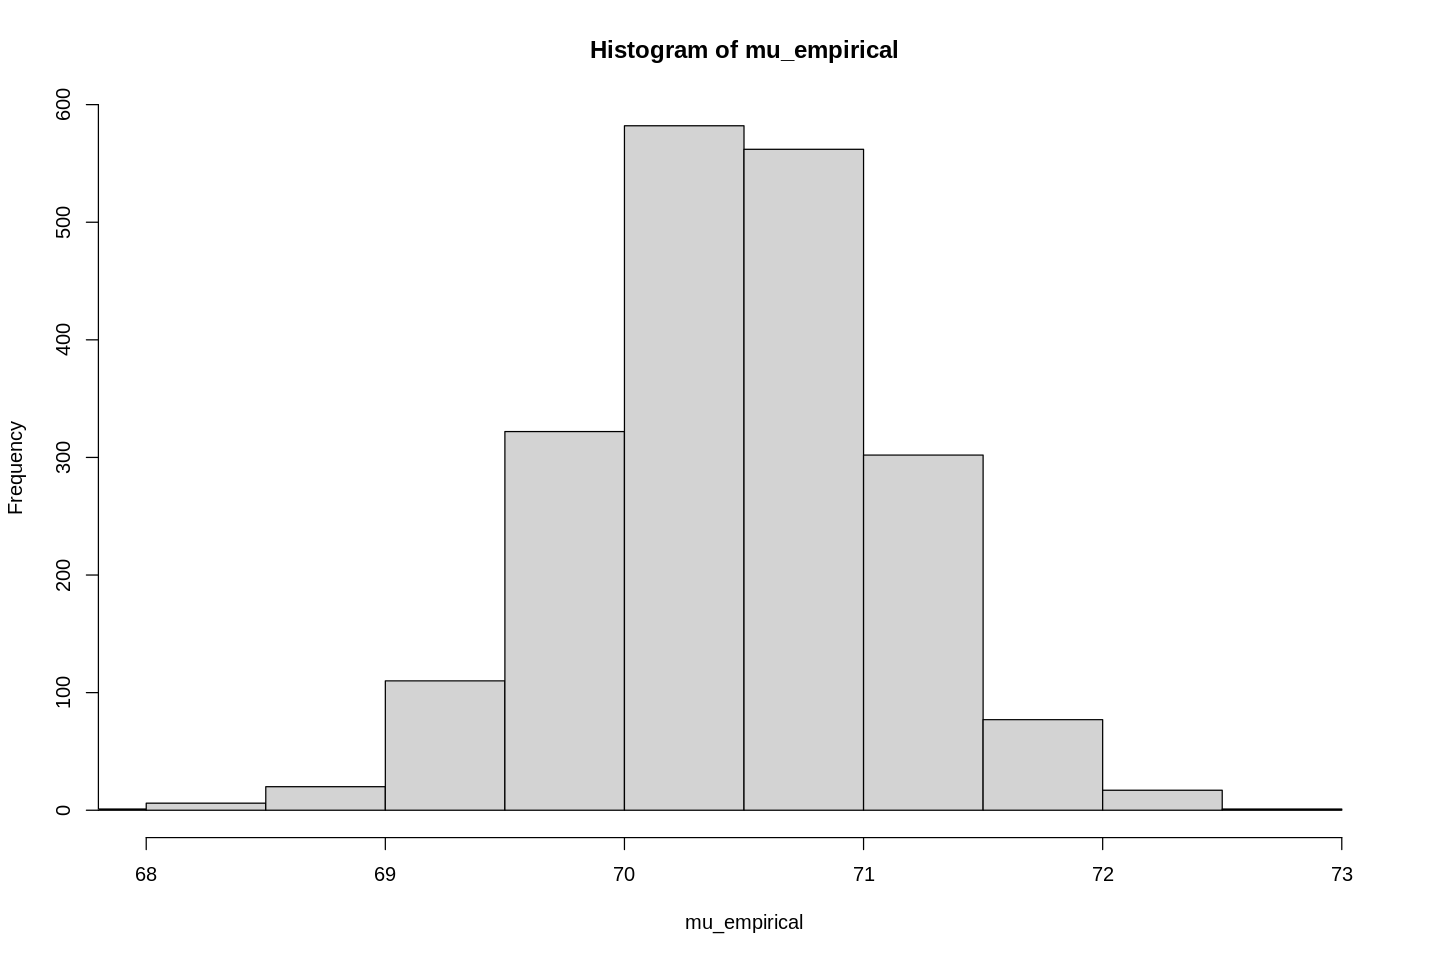

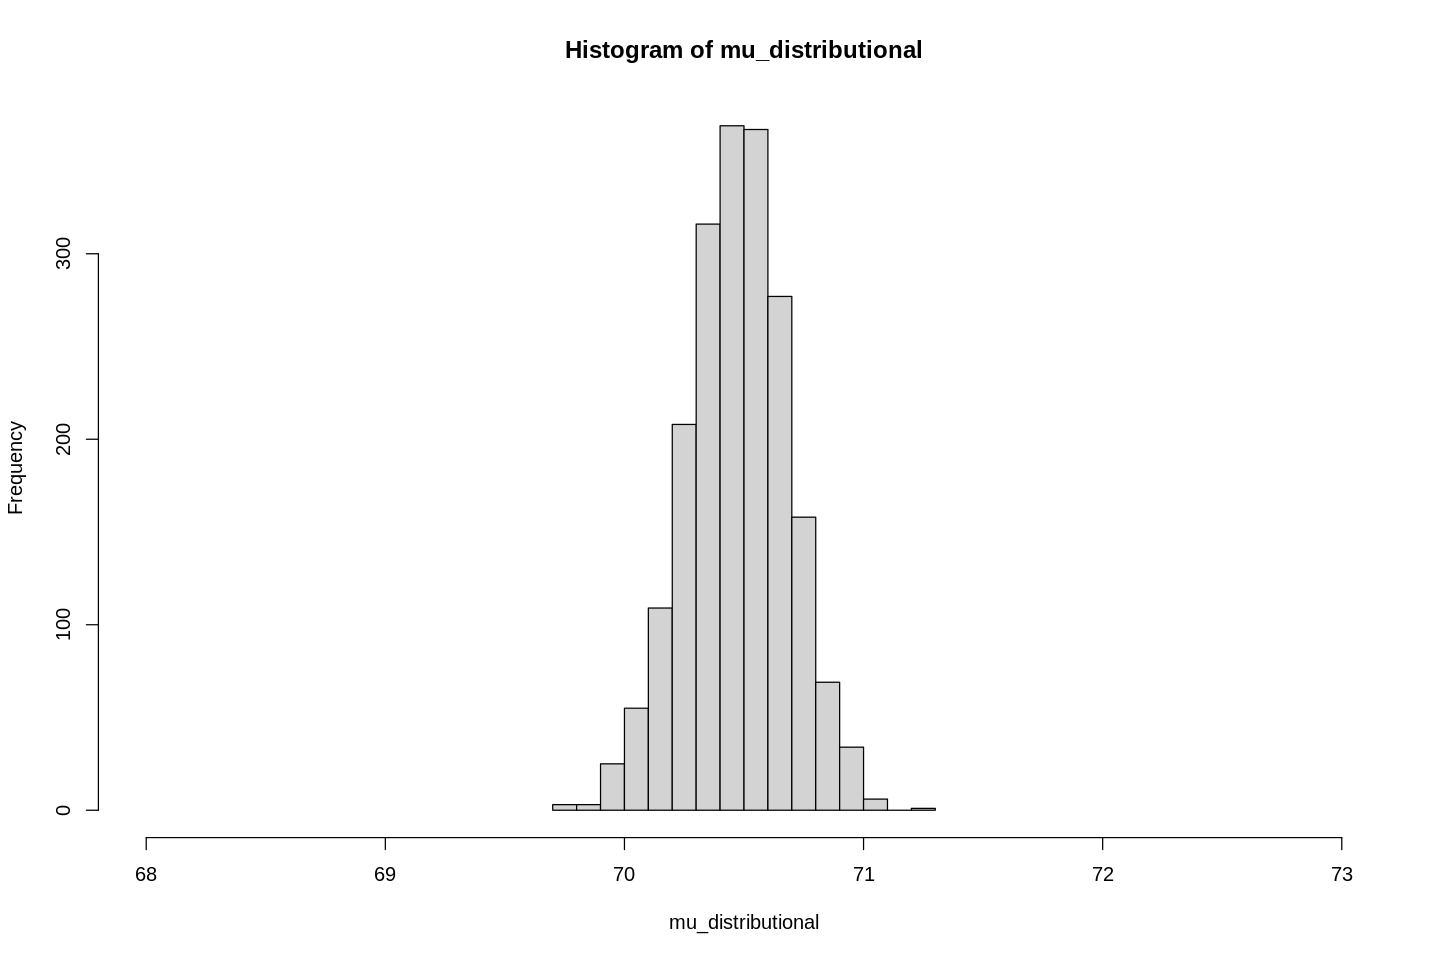

In [40]:
# Compare the means obtained by the different bootstrap procedures using histograms
hist(mu_empirical, xlim = c(68, 73))
hist(mu_distributional, xlim = c(68, 73))

The histograms above clearly shows how the means obtained by the *distributional* bootstrapping procedure are much more concentrated than the ones obtained by the *empirical* approach.

In [41]:
# In this cell we create a dataframe to help us plot the data with ggplot
# Create a sequence of years
years <- 1975:2016
# Extract means by column for each of the above years
means <- colMeans(life_expectancy[, paste0("X", years)], na.rm = TRUE)
# Create the dataframe for plotting
df_plot <- data.frame(year = years, mean = means)
# Add two columns to denote whether the mean value is below, above, or within 
# the bootstrapped 'empirical' and 'distributional' confidence intervals
df_plot$CI_emp_diff <- sapply(df_plot$mean, function (x) { 
  if (x < lb_empirical) {
    "Below CI"
  } else if (x <= ub_empirical) {
    "Within CI"
  } else {
    "Above CI"
  }
})
# "Distributional" bootstrap CI
df_plot$CI_dist_diff <- sapply(df_plot$mean, function (x) { 
  if (x < lb_distributional) {
    "Below CI"
  } else if (x <= ub_distributional) {
    "Within CI"
  } else {
    "Above CI"
  }
})

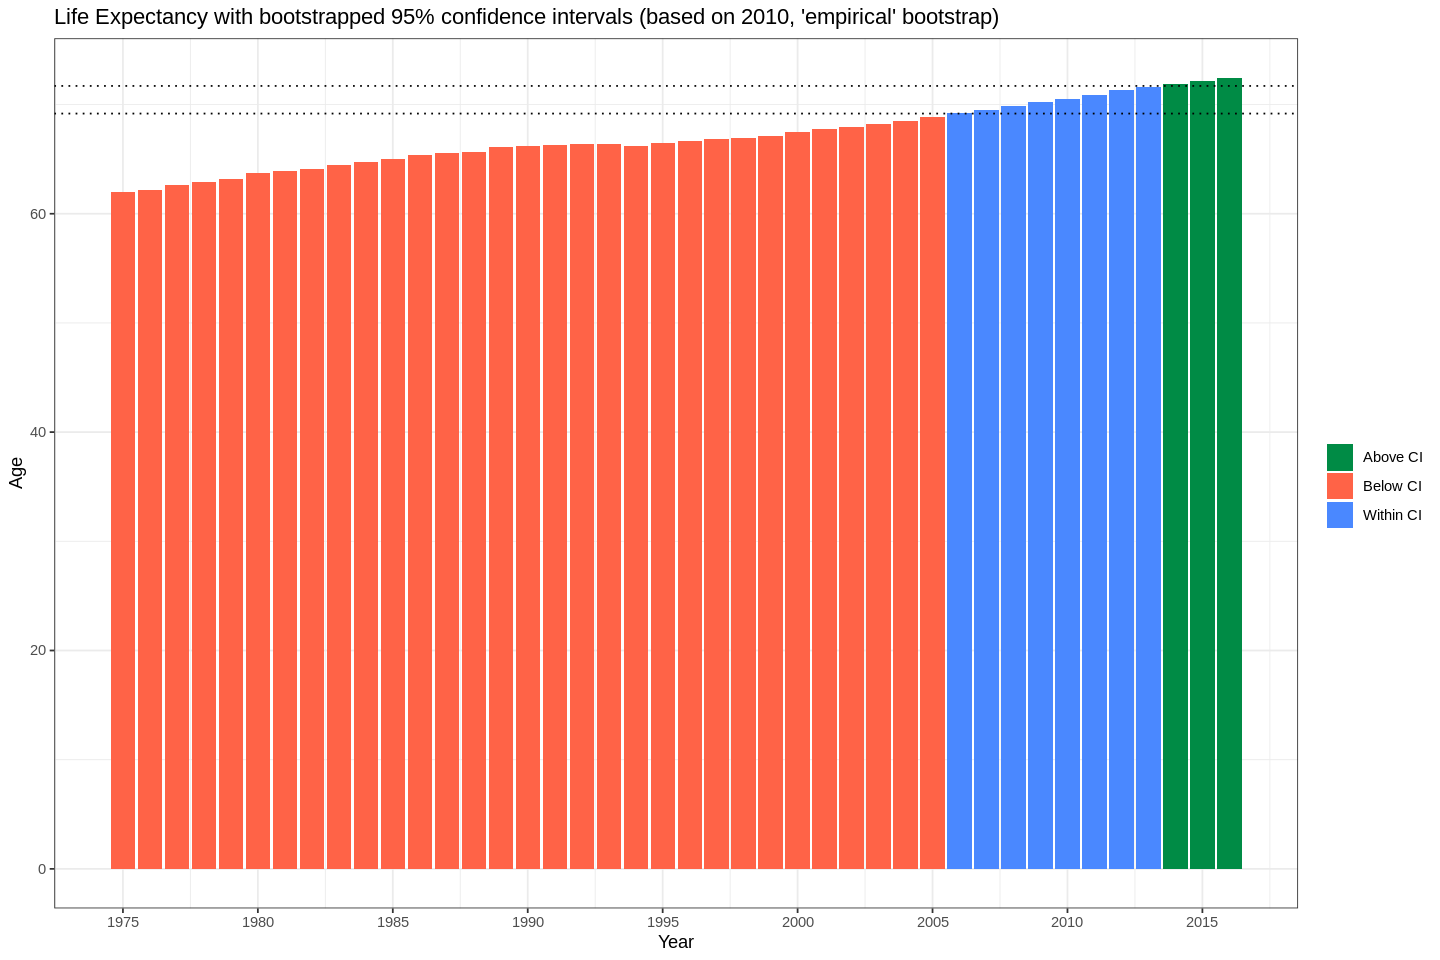

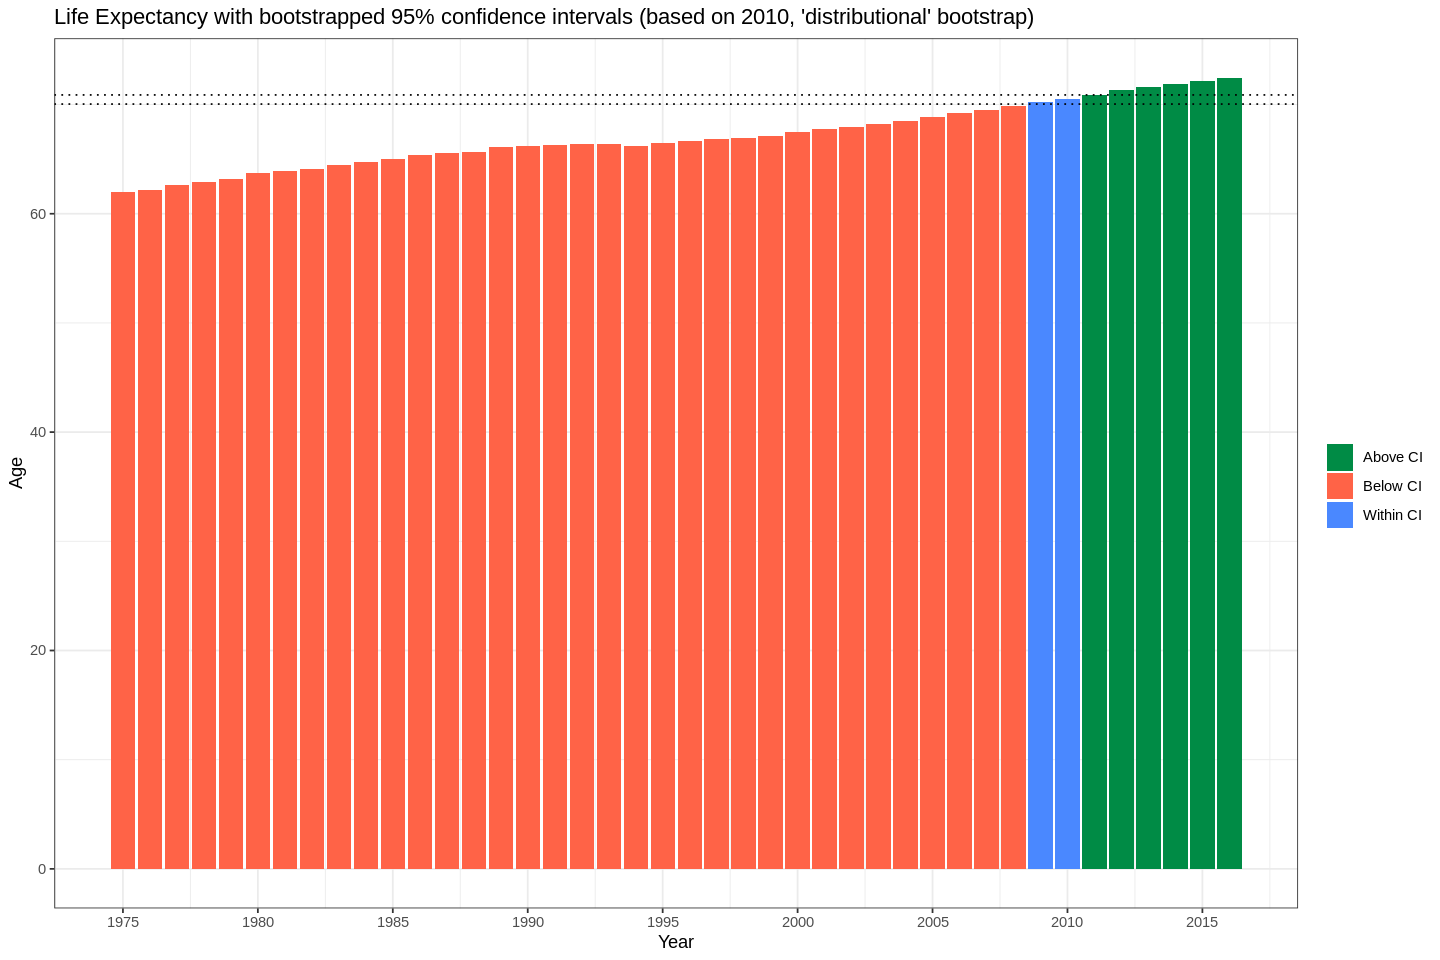

In [42]:
# Create a plot using ggplot with the underlying data being "df_plot", 
# the x-axis is defined by the "year" column and the y-axis by the "mean" column, 
# the fill of each bar is also defined by the "mean" column

# Plot for the empirical bootstrap
plot_empirical <- ggplot(data = df_plot, aes(x = year, y = mean, fill = CI_emp_diff)) + 
  # Display the data as bars (columns)
  geom_col() + 
  # Add custom fill colors (see: http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf)
  # for color names in R, or use Hex codes (see: https://www.color-hex.com/)
  scale_fill_manual(values = c("Above CI" = "springgreen4", 
    "Within CI" = "#4a88ff", "Below CI" = "tomato")) +
  # Scale the x-axis in a custom manner
  scale_x_continuous(breaks = seq(1975, 2016, by = 5)) +
  # Add confidence intervals (based on empirical bootstrap)
  geom_hline(yintercept = c(lb_empirical, ub_empirical), linetype = "dotted") +
  # Add labels to x- and y-axis, the fill legend as well as a title
  labs(x = "Year", y = "Age", fill = "",
  title = "Life Expectancy with bootstrapped 95% confidence intervals (based on 2010, 'empirical' bootstrap)") +
  # Prettify the plot using a theme
  theme_bw()

# Plot for the distributional bootstrap
plot_distributional <- ggplot(data = df_plot, aes(x = year, y = mean, fill = CI_dist_diff)) + 
  geom_col() + 
  scale_fill_manual(values = c("Above CI" = "springgreen4", 
    "Within CI" = "#4a88ff", "Below CI" = "tomato")) +
  scale_x_continuous(breaks = seq(1975, 2016, by = 5)) +
  # Add confidence intervals (based on distributional bootstrap)
  geom_hline(yintercept = c(lb_distributional, ub_distributional), linetype = "dotted") +
  labs(x = "Year", y = "Age", fill = "",
  title = "Life Expectancy with bootstrapped 95% confidence intervals (based on 2010, 'distributional' bootstrap)") +
  theme_bw()

# Display both plots
plot_empirical
plot_distributional

Based on the above plot, we see that the average life expectancy has significantly increased over the past years. There is a clear trend of life expectancy increasing over time, and we notice how the average life expectancy is significantly below that of 2010 in the preceding years (pre-2006 according to the *empirical* bootstrap and pre-2009 according to the *distributional* one), while it is significantly above in the following years (post-2013 according to the *empirical* bootstrap and post-2010 according to the *distributional* one).